In [4]:
import os
import pandas as pd
from numpy import median
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['font.size'] = 25.0

class Pres:
    def __init__(self, name, flist=[], slist=None, param=None, figsize=(24,14)):
        self.name = name
        self.flist = flist
        if slist: self.slist = slist
        if param: self.param = param
            
        self.fig, self.ax = plt.subplots(figsize=figsize)
        self.ax.grid(True)
        self.ax.xaxis.label.set_size(33)
        self.ax.yaxis.label.set_size(33)
        self.ax.xaxis.set_tick_params(labelsize=25)
        self.ax.yaxis.set_tick_params(labelsize=25)
        
    def setup(self, **kwargs):
        if "xlabel" in kwargs: 
            self.ax.set_xlabel(kwargs["xlabel"])
            del kwargs["xlabel"]
        if "ylabel" in kwargs: 
            self.ax.set_ylabel(kwargs["ylabel"])
            del kwargs["ylabel"]
        if "title" in kwargs and "title_fontsize" in kwargs:
            self.ax.set_title(kwargs["title"], fontsize=kwargs["title_fontsize"])
            del kwargs["title"]
            del kwargs["title_fontsize"]
        elif "title" in kwargs: 
            self.ax.set_title(kwargs["title"], fontsize=35)
            del kwargs["title"]
        return kwargs
    
    def plot(self):
        self.ax.plot(self.flist)
        
    def hist(self, *args, **kwargs):
        kwargs = self.setup(**kwargs)
        self.ax.hist(self.flist, **kwargs)
        
    def bar(self, *args, **kwargs):
        kwargs = self.setup(**kwargs)
        self.ax.bar(self.flist, self.slist, **kwargs)
        
    def pie(self, *args, **kwargs):
        kwargs = self.setup(**kwargs)
        self.ax.set_axis_off()
        return self.ax.pie(self.flist, **kwargs)
        
    def text(self, *args, **kwargs):
        if "fontsize" not in kwargs:
            self.ax.text(*args, **kwargs, fontsize=33)
        else:
            self.ax.text(*args, **kwargs)

    def legend(self, *args, **kwargs):
        plt.legend(*args, **kwargs)
            
    def save(self, **kwargs):
        if "fmt" not in kwargs: kwargs["fmt"] = "svg"
        pwd = os.getcwd()
        iPath = 'pictures'
        if not os.path.exists(iPath):
            os.mkdir(iPath)
        os.chdir(iPath)
        plt.savefig(f'{self.name}.{kwargs["fmt"]}', **kwargs)
        os.chdir(pwd)
        

class Seqs:
    def __init__(self, path):
        self.seq = []
        self.load_csv(path)
        
    def load_csv(self, path):
        try:
            seq_df = pd.read_csv(path)
            for index, row in seq_df.iterrows():
                self.seq.append(list(map(lambda x: int(x), row.values[1].split(","))))
            return True
        except Exception as exc:
            print(f"{self.__class__.__name__}:load_csv {exc}")
            return False
    
    def to_list(self):
        return self.seq
    
    def seqs_len(self):
        return [len(seq) for seq in self.seq]
    
    def num_digit(self):
        return list(map(lambda x: len(str(x)), [max(seq, key=lambda x: len(str(x))) for seq in self.seq ]))
        
    def count_nums(self, maxnum=5):
        countn = []
        allnum = [num for seq in self.seq for num in seq]
        for i in range(maxnum):
            countn.append(allnum.count(i))
        return list(range(maxnum)), countn

In [2]:
pres = Seqs("../../data/kaggle_test.csv")

In [ ]:
seqslen = pres.seqs_len()

In [ ]:
preslen = Pres("seqs_len", seqslen)
preslen.hist(bins = 347, width=1, color="#ed4322",
             xlabel="Length of sequence", 
             ylabel="Frequency of occurrence", 
             title="Frequency of occurrence of sequence lengths")
preslen.text(203, 2550, "Number of sequences: 113 845")
preslen.text(203, 2350, "Number of numbers: 4 614 863")
preslen.text(203, 2050, "Max length: " + str(max(seqslen)))
preslen.text(203, 1850, "Mode: " + str(max(set(seqslen), key=seqslen.count)))
preslen.text(203, 1650, "But sequences of 98 and 105 numbers", fontsize=26)
preslen.text(203, 1550, "are as common as mode", fontsize=26)
preslen.save(transparent=True)

In [ ]:
seqsnumdigit = pres.num_digit()

In [ ]:
presnumdigit = Pres("seqs_num_digits", seqsnumdigit)
presnumdigit.hist(bins = 80, width=2, color="#ed4322", log=True,
             xlabel="Number of digits in max number in sequence", 
             ylabel="Frequency of occurrence", 
             title="Frequency of occurrence of max number of digits in max number in sequence (log scaled)", 
             title_fontsize=29)
presnumdigit.text(110, 3000, "Max numbers of digits: " + str(max(seqsnumdigit)))
presnumdigit.text(110, 1450, "Median: " + str(median(seqsnumdigit)))
presnumdigit.save(transparent=True)

In [ ]:
nums, numnum = pres.count_nums(maxnum=201)

In [ ]:
prescountnums = Pres("count_nums", nums, numnum)
prescountnums.bar(width=1, color="#ed4322", log=True, align='center',
             xlabel="Number", 
             ylabel="Frequency of occurrence", 
             title="Frequency of occurrence of the first 200 numbers in dataset (log scaled)")
prescountnums.text(80, 150000, "37% of numbers in dataset less than 10")
prescountnums.save(transparent=True)

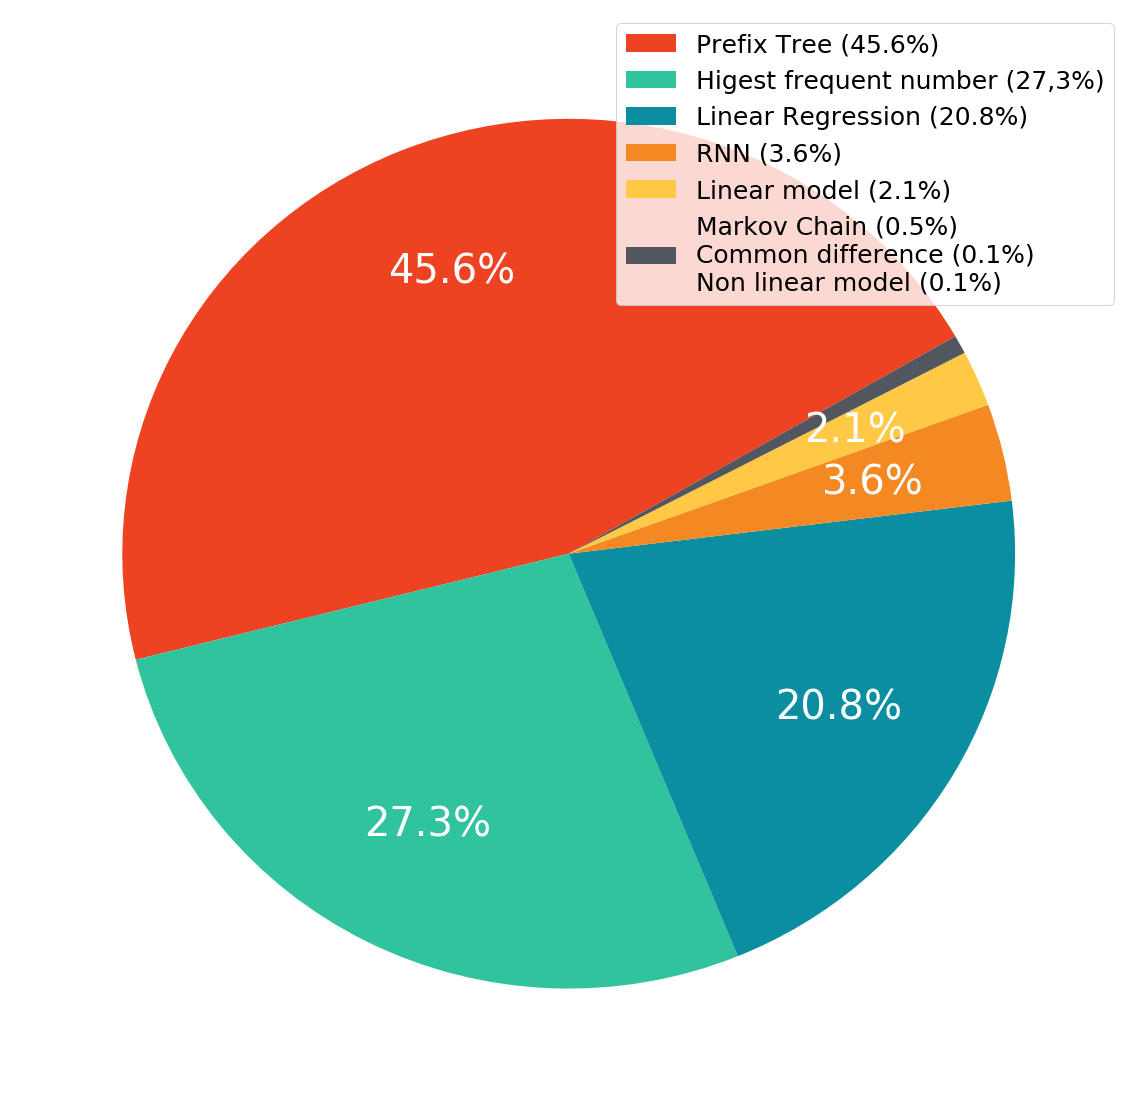

In [11]:
models = ["Prefix Tree (45.6%)", "Higest frequent number (27,3%)", "Linear Regression (20.8%)", "RNN (3.6%)", "Linear model (2.1%)", "Markov Chain (0.5%) \nCommon difference (0.1%) \nNon linear model (0.1%)"]
solved = [113846-61948,31040,23639,4116,2367,592+101+93]
pressolvedpie = Pres("solved_pie", solved, models, figsize=(20,20))
colors = ['#ed4322','#30c39e', '#0a8ea0', '#f48924', '#ffc845', '#52565e']
patches, texts, autotexts = pressolvedpie.pie(colors=colors, autopct=lambda x: '{p:.1f}%'.format(p=x) if x > 1 else '', startangle=30, pctdistance=0.7)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size(40)
pressolvedpie.legend(patches, models, loc="best")
pressolvedpie.save(transparent=True)